In [168]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math

def separador():
    print("-------------------------------------------------------------------------------------------------------------------")

In [169]:
#le arquibo com tempos obtidos de experimentos
data = pd.read_csv("../DADOS/tempos.csv")

In [170]:
print(data)

     Pessoa Tipo_mov  Travessia  10m_1  10m_2  20m_1  20m_2  30m_1  30m_2
0   Matheus      MRU          1   7.10   7.64  14.47  14.99  21.53  22.01
1   Matheus      MRU          2   7.53   6.27  14.11  13.11  21.30  20.28
2   Matheus      MRU          3   7.30   7.21  15.18  14.33  21.49  21.48
3   Gabriel      MRU          1   8.35   8.07  15.78  15.33  22.76  22.57
4   Gabriel      MRU          2   8.51   7.91  15.28  14.78  22.31  21.79
5   Gabriel      MRU          3   8.31   8.38  16.21  16.45  23.44  23.74
6      Kazu      MRU          1   6.79   6.57  12.98  12.87  19.21  19.00
7      Kazu      MRU          2   6.85   6.97  13.22  12.87  19.44  19.52
8      Kazu      MRU          3   7.01   6.97  13.37  13.60  19.80  20.23
9   Matheus      MUV          1   9.39   9.00  13.41  13.54  16.76  16.95
10  Matheus      MUV          2   8.77   8.91  12.92  13.26  16.73  16.76
11  Matheus      MUV          3   9.74  10.07  13.82  14.12  17.12  17.35
12  Gabriel      MUV          1   7.72

In [171]:
#calculates the average of the two time measurements
data_fixed = data.copy()
#selects the three first columns
data_fixed = data_fixed.loc[:, 'Pessoa' : 'Travessia']
#adds columns containing the time values
for i in range(1, 4):
    data_fixed[str(i) + "0m"] = (data.iloc[:, (i * 2) + 1] + data.iloc[:, (i * 2) + 2]) / 2

print(data_fixed)

     Pessoa Tipo_mov  Travessia    10m     20m     30m
0   Matheus      MRU          1  7.370  14.730  21.770
1   Matheus      MRU          2  6.900  13.610  20.790
2   Matheus      MRU          3  7.255  14.755  21.485
3   Gabriel      MRU          1  8.210  15.555  22.665
4   Gabriel      MRU          2  8.210  15.030  22.050
5   Gabriel      MRU          3  8.345  16.330  23.590
6      Kazu      MRU          1  6.680  12.925  19.105
7      Kazu      MRU          2  6.910  13.045  19.480
8      Kazu      MRU          3  6.990  13.485  20.015
9   Matheus      MUV          1  9.195  13.475  16.855
10  Matheus      MUV          2  8.840  13.090  16.745
11  Matheus      MUV          3  9.905  13.970  17.235
12  Gabriel      MUV          1  7.975  12.185  15.690
13  Gabriel      MUV          2  7.715  11.795  15.040
14  Gabriel      MUV          3  7.085  11.245  14.795
15     Kazu      MUV          1  6.540  10.400  13.620
16     Kazu      MUV          2  6.715  10.450  13.645
17     Kaz

In [172]:
#calcules the average speed
# data_fixed["Velocidade_media"] = (30.0 / data_fixed["30m"])
# print(data_fixed)

In [173]:
#simplifies data storing

#saves only the speeds
v = data_fixed.loc[:, "10m" : "30m"]
#saves only the people names
pessoas = v_mru["Pessoa"].unique()
print(v)

      10m     20m     30m
0   7.370  14.730  21.770
1   6.900  13.610  20.790
2   7.255  14.755  21.485
3   8.210  15.555  22.665
4   8.210  15.030  22.050
5   8.345  16.330  23.590
6   6.680  12.925  19.105
7   6.910  13.045  19.480
8   6.990  13.485  20.015
9   9.195  13.475  16.855
10  8.840  13.090  16.745
11  9.905  13.970  17.235
12  7.975  12.185  15.690
13  7.715  11.795  15.040
14  7.085  11.245  14.795
15  6.540  10.400  13.620
16  6.715  10.450  13.645
17  6.235  10.100  13.280


In [190]:
#selects the time calculations for the uniform movement
v_mru = data_fixed[data_fixed.Tipo_mov == "MRU"]
v_muv = data_fixed[data_fixed.Tipo_mov == "MUV"]
data_unique = pd.DataFrame()
print(v_mru)
separador()

#calculates the average of each person
for p in pessoas:
    dtf = v_mru[v_mru.Pessoa == p].loc[:, "10m" : "30m"].T
    data_unique[p] = (dtf.iloc[:, 0] + dtf.iloc[:, 1] + dtf.iloc[:, 2])/3.0
#adds the average speed to the time calculations
data_unique["Média"] = (data_unique.iloc[:, 0] + data_unique.iloc[:, 1] + data_unique.iloc[:, 2]) / 3.0
data_unique = data_unique.T

#adds the ideal average time for each 10m space
data_unique["Velocidade_media"] = 30.0 / data_unique["30m"]
data_unique["10m_calc"] = 10 / data_unique["Velocidade_media"]
data_unique["20m_calc"] = 20 / data_unique["Velocidade_media"]
data_unique["30m_calc"] = 30 / data_unique["Velocidade_media"]
print(data_unique)


    Pessoa Tipo_mov  Travessia    10m     20m     30m
0  Matheus      MRU          1  7.370  14.730  21.770
1  Matheus      MRU          2  6.900  13.610  20.790
2  Matheus      MRU          3  7.255  14.755  21.485
3  Gabriel      MRU          1  8.210  15.555  22.665
4  Gabriel      MRU          2  8.210  15.030  22.050
5  Gabriel      MRU          3  8.345  16.330  23.590
6     Kazu      MRU          1  6.680  12.925  19.105
7     Kazu      MRU          2  6.910  13.045  19.480
8     Kazu      MRU          3  6.990  13.485  20.015
-------------------------------------------------------------------------------------------------------------------
           10m        20m        30m  Velocidade_media  10m_calc   20m_calc  \
Matheus  7.175  14.365000  21.348333          1.405262  7.116111  14.232222   
Gabriel  8.255  15.638333  22.768333          1.317620  7.589444  15.178889   
Kazu     6.860  13.151667  19.533333          1.535836  6.511111  13.022222   
Média    7.430  14.385000  2

In [191]:
#gets data for each person
du_copy =  data_unique.copy()
matheus_data = du_copy.loc["Matheus"].values
gabriel_data = du_copy.loc["Gabriel"].values
kazu_data = du_copy.loc["Kazu"].values
#auxiliary data
xRange = [0,10,20,30]

#changes to logarithmic scale
for i in range (len(matheus_data)):
    matheus_data[i] = math.log(matheus_data[i])
    gabriel_data[i] = math.log(gabriel_data[i])
    kazu_data[i] = math.log(kazu_data[i])
#adds 0s to fit plotting
matheus_data = np.insert(matheus_data, 0, 0)
gabriel_data = np.insert(gabriel_data, 0, 0)
kazu_data = np.insert(kazu_data, 0, 0)
matheus_data = np.insert(matheus_data, 5, 0)
gabriel_data = np.insert(gabriel_data, 5, 0)
kazu_data = np.insert(kazu_data, 5, 0)
print(matheus_data)
print(matheus_data[0:4])
print(matheus_data[5:9])

[0.         1.97060276 2.66479469 3.06097367 0.34022371 0.
 1.96236138 2.65550856 3.06097367]
[0.         1.97060276 2.66479469 3.06097367]
[0.         1.96236138 2.65550856 3.06097367]


[Text(0, 0.5, 'Time'), Text(0.5, 0, 'Position'), Text(0.5, 1.0, 'Kazu')]

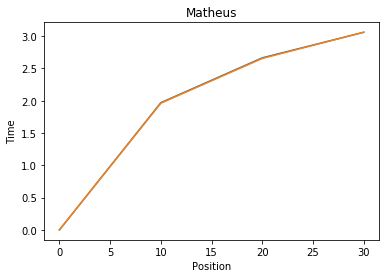

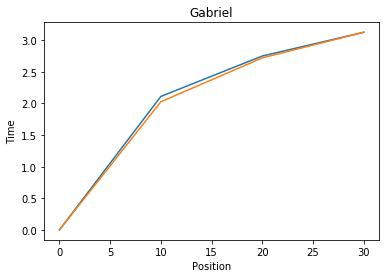

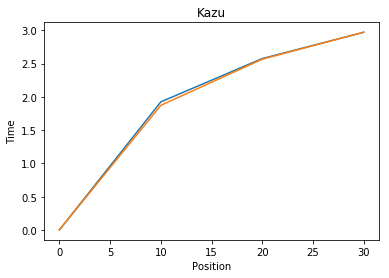

In [192]:
#plotar graficos

#plotar grafico Matheus
plt.figure(1)
m_plt = plt.subplot()
#draws actual values
m_plt.plot(xRange, matheus_data[0:4])
#draws uniform values
m_plt.plot(xRange, matheus_data[5:9])
m_plt.set(ylabel = 'Time', xlabel = 'Position', title = "Matheus")

#plotar grafico Gabriel
plt.figure(2)
g_plt = plt.subplot()
#draws actual values
g_plt.plot(xRange, gabriel_data[0:4])
#draws uniform values
g_plt.plot(xRange, gabriel_data[5:9])
g_plt.set(ylabel = 'Time', xlabel = 'Position', title = "Gabriel")

#plotar grafico Kazu
plt.figure(3)
k_plt = plt.subplot()
#draws actual values
k_plt.plot(xRange, kazu_data[0:4])
#draws uniform values
k_plt.plot(xRange, kazu_data[5:9])
k_plt.set(ylabel = 'Time', xlabel = 'Position', title = "Kazu")